# Task No. 3: Data Analysis

### import libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### import the data

In [51]:
data = pd.read_csv("posts.csv")
data

,Unnamed: 0,tag_name,followed_by,comment,tag_count,like
0,0,2021,774304,626,0,50311
1,1,2021,68438,7,11,1957
2,2,2021,3122,102,23,595
3,3,2021,250500,123573,5,8290
4,4,2021,3578,26,4,365
...,...,...,...,...,...,...
2165,2165,world,2002,28,15,74
2166,2166,world,72,0,8,7
2167,2167,world,1386,0,19,4
2168,2168,world,450271,260,19,8371


#### سطر هایی از دیتا که مقادیر خالی دارند و فالور هایشان 0 است را حذف میکنیم

In [52]:
data.dropna()
data = data[data.followed_by != 0]
print("data.shape: ",data.shape)
print("data.columns: ",data.columns)

data.shape:  (2165, 6)
data.columns:  Index(['Unnamed: 0', 'tag_name', 'followed_by', 'comment', 'tag_count',
       'like'],
      dtype='object')


###### ER = engagement_rate = engagements/followers
###### با توجه به دیتا، تعامل پست را جمع لایک و کامنت در نظر میگیریم

In [53]:
like =np.asanyarray( data.like)
comment = np.asanyarray(data.comment)
follower = np.asanyarray(data.followed_by)
tag_count = np.asanyarray(data.tag_count)

ER = (like + comment) / follower
print(ER)

[0.06578424 0.02869751 0.22325432 ... 0.002886   0.01916846 0.4047619 ]


##### Micro-influencer : less than 15,000 followers
##### Regular-influencer : between 15,000 and 50,000 followers
##### Rising-influencer : between 50,000 and 100,000 followers
##### Mid-influencer : between 100,000 and 500,000 followers
##### Macro-influencer : between 500,000 and 1,000,000 followers
##### Mega-influencer : more than 1,000,000 followers

In [54]:
micro_filter = follower <= 15000
regular_filter = np.array(list(map(lambda q: 15000 < q <= 50000,follower)))
rising_filter = np.array(list(map(lambda q: 50000 < q <= 100000,follower)))
mid_filter = np.array(list(map(lambda q: 100000 < q <= 500000,follower)))
macro_filter = np.array(list(map(lambda q: 500000 < q <= 1000000,follower)))
mega_filter = 1000000 < follower

In [55]:
print(micro_filter.shape)
print(micro_filter)

(2165,)
[False False  True ...  True False  True]


In [56]:
influencers = np.zeros((len(data) , 5))
influencers[:,0] = follower
influencers[:,1] = comment
influencers[:,2] = tag_count
influencers[:,3] = like
influencers[:,4] = ER

In [57]:
micro_influencer = np.zeros((micro_filter.sum() , 5))   #micro_filter.sum()  : count of "True"s
micro_influencer = influencers[micro_filter]

regular_influencer = np.zeros((regular_filter.sum() , 5))
regular_influencer = influencers[regular_filter]

rising_influencer = np.zeros((rising_filter.sum() , 5))
rising_influencer = influencers[rising_filter]

mid_influencer = np.zeros((mid_filter.sum() , 5))
mid_influencer = influencers[mid_filter]

macro_influencer = np.zeros((macro_filter.sum() , 5))
macro_influencer = influencers[macro_filter]

mega_influencer = np.zeros((mega_filter.sum() , 5))
mega_influencer = influencers[mega_filter]

In [58]:
# Delete extra variables
del micro_filter
del regular_filter
del rising_filter
del mid_filter
del macro_filter
del mega_filter

In [59]:
print(micro_influencer.shape)
print(regular_influencer.shape)
print(rising_influencer.shape)
print(macro_influencer.shape)
print(mega_influencer.shape)

(1549, 5)
(191, 5)
(118, 5)
(73, 5)
(24, 5)


#### :رسم نمودار
### log(ER)_log(follower)

<ipython-input-60-223c2fa2a71f>:2: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(ER)


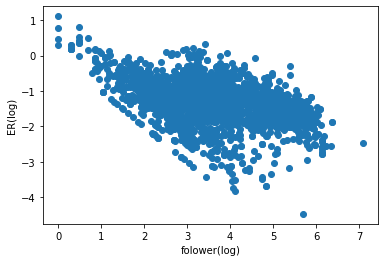

In [60]:
x = np.log10(influencers[:,0])   # influencers[:,0] ===> followers
y = np.log10(ER)

plt.scatter(x , y)
plt.xlabel("folower(log)")
plt.ylabel("ER(log)")
plt.show()

#### نمودار:
#### Average engagement rate for posts containing hashtags vs posts containing no hashtag

In [61]:
without_tag_filter = influencers[:,2] == 0   #influencers[:,2] ===> tag_count
ER_without_tag = ER[without_tag_filter]
ER_with_tag = ER[~without_tag_filter]

print(ER_with_tag.shape)
print(ER_without_tag.shape)

(1952,)
(213,)


In [62]:
micro_without_tag_filter = micro_influencer[:,2] == 0   #micro_influencer[:,2] ===> tag_count
micro_without_tag = micro_influencer[micro_without_tag_filter]
micro_with_tag = micro_influencer[~micro_without_tag_filter]

regular_without_tag_filter = regular_influencer[:,2] == 0   #regular_influencer[:,2] ===> tag_count
regular_without_tag = regular_influencer[regular_without_tag_filter]
regular_with_tag = regular_influencer[~regular_without_tag_filter]

rising_without_tag_filter = rising_influencer[:,2] == 0   #rising_influencer[:,2] ===> tag_count
rising_without_tag = rising_influencer[rising_without_tag_filter]
rising_with_tag = rising_influencer[~rising_without_tag_filter]

mid_without_tag_filter = mid_influencer[:,2] == 0   #mid_influencer[:,2] ===> tag_count
mid_without_tag = mid_influencer[mid_without_tag_filter]
mid_with_tag = mid_influencer[~mid_without_tag_filter]

macro_without_tag_filter = macro_influencer[:,2] == 0   #macro_influencer[:,2] ===> tag_count
macro_without_tag = macro_influencer[macro_without_tag_filter]
macro_with_tag = macro_influencer[~macro_without_tag_filter]

mega_without_tag_filter = mega_influencer[:,2] == 0   #mega_influencer[:,2] ===> tag_count
mega_without_tag = mega_influencer[mega_without_tag_filter]
mega_with_tag = mega_influencer[~mega_without_tag_filter]


In [63]:
# Delete extra variables
del micro_without_tag_filter
del regular_without_tag_filter
del rising_without_tag_filter
del mid_without_tag_filter
del macro_without_tag_filter
del mega_without_tag_filter

In [64]:

#Calculate the ER average(with tags vs without tags)
with_tag = np.zeros((6,))   #creat the matrix
without_tag = np.zeros((6,))
with_tag[0] = micro_with_tag[:,4].mean()   #micro_with_tag[:,4] ===> ER
without_tag[0] = micro_without_tag[:,4].mean()
with_tag[1] = regular_with_tag[:,4].mean()
without_tag[1] = regular_without_tag[:,4].mean()
with_tag[2] = rising_with_tag[:,4].mean()
without_tag[2] = rising_without_tag[:,4].mean()
with_tag[3] = mid_with_tag[:,4].mean()
without_tag[3] = mid_without_tag[:,4].mean()
with_tag[4] = macro_with_tag[:,4].mean()
without_tag[4] = macro_without_tag[:,4].mean()
with_tag[5] = mega_with_tag[:,4].mean()
without_tag[5] = mega_without_tag[:,4].mean()

print("with_tag: ",with_tag)
print("without_tag: ",without_tag)

with_tag:  [0.1825083  0.05779424 0.05456328 0.03457841 0.01765999 0.01013483]
without_tag:  [0.13377462 0.10925327 0.06818584 0.03660096 0.02482589 0.01184548]


([<matplotlib.axis.XTick at 0x19fffed1580>,
 [Text(0, 0, 'micro'),
  Text(1, 0, 'ragular'),
  Text(2, 0, 'rising'),
  Text(3, 0, 'mid'),
  Text(4, 0, 'macro'),
  Text(5, 0, 'mega')])

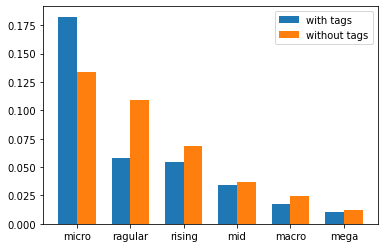

In [65]:
labels = np.array(["micro" , "ragular" , "rising" , "mid" , "macro" , "mega"])
x = np.arange(len(labels))
width = 0.35  # the width of the bars

plt.bar(x-width/2 , with_tag , width=width  , label="with tags")
plt.bar(x+width/2 , without_tag , width=width , label="without tags")
plt.legend()
plt.xticks(x,labels)

In [70]:
tag_name = np.asanyarray(data.tag_name)
tag_name_list = np.unique(tag_name)
ER_tag_names = np.zeros((len(tag_name_list),))
for i in range(len(tag_name_list)):
    ER_tag_names[i] = np.median(ER[tag_name == tag_name_list[i]])
  

array(['2021', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Belgium', 'Brazil', 'Cameroon', 'Chile',
       'Computer', 'Ecuador', 'Egypt', 'Greece', 'Iraq', 'Israel',
       'Mexico', 'Morocco', 'NBA', 'Netherlands', 'New_Zealand', 'Oman',
       'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Senegal', 'Serbia', 'Spain', 'Thailand', 'Turkey',
       'USA', 'Ukraine', 'Uzbekistan', 'amazon', 'animal', 'arab',
       'artwork', 'asia', 'bitcoin', 'blockchain', 'buy', 'canada', 'cat',
       'ceo', 'chef', 'chigago', 'china', 'club', 'collection',
       'dairyfree', 'dog', 'europe', 'films', 'fish', 'florida', 'food',
       'football', 'forex', 'forexlife', 'game', 'germany', 'girl',
       'girls', 'god', 'goldenretriever', 'gym', 'hard', 'home', 'house',
       'iran', 'japan', 'jumper', 'lazday', 'london', 'love', 'mensstyle',
       'messi', 'minesota', 'movie', 'newyear', 'newyork', 'pasta',
       'perfu

In [95]:
# Sort hashtags based on medin ER
sorted_ER = np.zeros((len(ER_tag_names),))
sorted_tags = np.empty(len(tag_name_list) ,dtype='O')
sorted_ER = np.sort(ER_tag_names)
sorted_ER = sorted_ER[::-1]  #از بزگتر به کوچکتر

   
for i in range(len(ER_tag_names)):
    index = np.where(ER_tag_names == sorted_ER[i])
    sorted_tags[i] = tag_name_list[index]


array([array(['sky'], dtype=object), array(['see'], dtype=object),
       array(['Poland'], dtype=object), array(['Israel'], dtype=object),
       array(['germany'], dtype=object), array(['sea'], dtype=object),
       array(['Romania'], dtype=object), array(['water'], dtype=object),
       array(['Serbia'], dtype=object), array(['Ukraine'], dtype=object),
       array(['goldenretriever'], dtype=object),
       array(['Greece'], dtype=object), array(['Mexico'], dtype=object),
       array(['puppy'], dtype=object), array(['soft'], dtype=object),
       array(['Oman'], dtype=object), array(['Albania'], dtype=object),
       array(['fish'], dtype=object), array(['iran'], dtype=object),
       array(['snow'], dtype=object),
       array(['New_Zealand'], dtype=object),
       array(['Chile'], dtype=object), array(['newyear'], dtype=object),
       array(['love'], dtype=object), array(['club'], dtype=object),
       array(['Argentina'], dtype=object),
       array(['Austria'], dtype=object), 

In [68]:
a = np.array([1,2,3,4])
b = a[::-1]
print(b)

[4 3 2 1]
